In [141]:
import numpy as np
import matplotlib.pyplot as plt

In [142]:
m = 20             # longitud del genotipo
pob_size = 50      # tamaño de la población 
a = -512            # valor mínimo de x
b = 512             # valor máximo de x
decimales=3        # número de decimales
n = 2              # variables a considerar
t = m * n          # total de bits 
epsilon = 1e-6     # cota de selección
proba_cruza = 0.8  # probabilidad de cruza
proba_muta = 1/t   # probabilidad de mutación
generaciones = 50  # número de generaciones
etapas = 5        # número de etapas  

In [143]:
def gen_pop(pob_size, t):
    return np.random.randint(0, 2, (pob_size, t))

In [144]:
pob = gen_pop(pob_size, t)
print("Población:")
print(pob)

Población:
[[0 0 0 ... 1 1 0]
 [0 0 0 ... 0 1 0]
 [1 0 0 ... 0 1 0]
 ...
 [0 1 0 ... 0 0 1]
 [0 0 1 ... 0 1 1]
 [0 1 1 ... 1 0 0]]


In [145]:
def deco(genotipo): 
    powers = 2 ** np.arange(m-1, -1, -1)
    return np.dot(genotipo, powers)


In [146]:
def deco_ind(ind, m, a, b, decimales):
    decoded = []
    for i in range(n):
        start = i * m
        end = start + m
        gene = ind[start:end]
        valor_deco = deco(gene)
        x = a + valor_deco * (b - a) / (2**m - 1)
        decoded.append(round(x, decimales))
    return np.array(decoded)


In [147]:
#def funcion(x):
    #return np.sum(x**2)
#def funcion(x,y):
     #return np.sum(x**2) # esfera
    #return np.sum(100 * (x[1:] - x[:-1]**2)**2 + (1 - x[:-1])**2) #rosenbrock
 #   return (x**2 + y - 11)**2 + (x + y**2 - 7)**2 #himmenblau

def funcion(x,y):
   term1 = np.sin(np.sqrt(np.abs(x/2 + y + 47)))
   term2 = np.sin(np.sqrt(np.abs(x - (y + 47))))
   return -(y + 47) * term1 - x * term2



In [148]:
def eva_funcion(ind, a, b, m, decimales):
    x,y= deco_ind(ind, a, b, m, decimales)
    return funcion(x,y)

In [149]:
def main():
    
    for idx, ind in enumerate(pob):
        decoded = deco_ind(ind, m, a, b, decimales)
        evaluation = eva_funcion(ind, m, a, b, decimales)
        print(f"\nIndividuo {idx+1}:")
        print("Genotipo:", ind)
        print("Fenotipo:", decoded)
        print("Evaluación f(x):", evaluation)

if __name__ == "__main__":
    main()



Individuo 1:
Genotipo: [0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1
 1 1 0]
Fenotipo: [-495.571 -218.83 ]
Evaluación f(x): -203.03619883239557

Individuo 2:
Genotipo: [0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1
 0 1 0]
Fenotipo: [-490.086  301.886]
Evaluación f(x): -70.45720574859959

Individuo 3:
Genotipo: [1 0 0 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0
 0 1 0]
Fenotipo: [  88.849 -138.841]
Evaluación f(x): -16.169131758898473

Individuo 4:
Genotipo: [1 1 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0
 0 1 1]
Fenotipo: [ 492.187 -314.622]
Evaluación f(x): -587.6312134140815

Individuo 5:
Genotipo: [0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 0
 1 0 1]
Fenotipo: [-300.698   -5.213]
Evaluación f(x): -66.14859289590716

Individuo 6:
Genotipo: [0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1
 0 0 0]
Fenotipo: [-345.773 -350.2

In [150]:
def torneo(pob, m, a, b, decimales, epsilon):
    idx1 = np.random.randint(0, len(pob))
    idx2 = np.random.randint(0, len(pob))

    f1 = eva_funcion(pob[idx1],m, a, b, decimales)
    f2 = eva_funcion(pob[idx2],m, a, b, decimales)

    if f1 < f2:
        return pob[idx1], idx1
    else:
        return pob[idx2], idx2

In [151]:
def cruzar(padre1, padre2, prob_cruza):
    if np.random.rand() < prob_cruza:
        point = np.random.randint(1, len(padre1))
        hijo1 = np.concatenate((padre1[:point], padre2[point:]))
        hijo2 = np.concatenate((padre2[:point], padre1[point:]))
        return hijo1, hijo2
    else:
        return padre1.copy(), padre2.copy()

In [152]:
def mutar(ind, prob_muta):
    mutante = ind.copy()
    for i in range(len(mutante)):
        if np.random.rand() < prob_muta:
            mutante[i] = 1 - mutante[i]
    return mutante

In [ ]:
def AG_etapas_ruleta(pob_size, m, a, b, decimales, epsilon, proba_cruza, proba_muta,
                     etapas, generaciones):
    pob = gen_pop(pob_size, t)
    
    mejor_hijo = None
    mejor_aptitud = np.inf
    total_generacion = 0
    h = []      # Historial de la mejor evaluación en cada generación
    h_pp = []  # Historial del promedio de evaluaciones en cada generación
    
    elite = int(np.ceil(0.2 * pob_size))
    
    for eta in range(etapas):
        print(f"\n=== Etapa {eta+1} ===")
        eta_h = []
        eta_h_pp = []
        for gen in range(generaciones):
            total_generacion += 1
            evaluar = [eva_funcion(ind, m, a, b, decimales) for ind in pob]
            mejor_ahora = min(evaluar)
            current_avg = np.mean(evaluar)
            eta_h.append(mejor_ahora)
            eta_h_pp.append(current_avg)
            h.append(mejor_ahora)
            h_pp.append(current_avg)

            if mejor_ahora < mejor_aptitud:
                mejor_aptitud = mejor_ahora
                mejor_hijo = pob[evaluar.index(mejor_ahora)]

            if total_generacion % 10 == 0:
                print(f"Generación {total_generacion} - Mejor: {round(mejor_ahora, decimales)} | Promedio: {round(current_avg, decimales)}")

            #if round(mejor_ahora, decimales) <= target:
            #    print("Se ha alcanzado el objetivo")
            #   return mejor_hijo, mejor_ahora, total_generacion, h, h_pp 
            
            # elitismo
            sorted_indices = np.argsort(evaluar)
            elite_idx = [pob[i] for i in sorted_indices[:elite]]
            
            
            new_pob_elite = []
            while len(new_pob_elite) < (pob_size - elite):
                padre1, _ = torneo(pob, m, a, b, decimales, epsilon)
                padre2, _ = torneo(pob, m, a, b, decimales, epsilon)
                
                hijo1, hijo2 = cruzar(padre1, padre2, proba_cruza)
                hijo1 = mutar(hijo1, proba_muta)
                hijo2 = mutar(hijo2, proba_muta)
                
                new_pob_elite.append(hijo1)
                if len(new_pob_elite) < (pob_size - elite):
                    new_pob_elite.append(hijo2)
            
            pob = np.array(new_pob_elite + elite_idx)
        print(f"Fin de la Etapa {eta+1}: Mejor en etapa: {round(min(eta_h), decimales)} | Promedio etapa: {round(np.mean(eta_h_pp), decimales)}")
    
    return mejor_hijo, mejor_aptitud, total_generacion, h, h_pp

Iteración 1

=== Etapa 1 ===
Generación 10 - Mejor: -888.729 | Promedio: -492.46
Generación 20 - Mejor: -888.863 | Promedio: -651.596
Generación 30 - Mejor: -888.866 | Promedio: -711.753
Generación 40 - Mejor: -888.866 | Promedio: -659.306
Generación 50 - Mejor: -888.866 | Promedio: -694.924
Fin de la Etapa 1: Mejor en etapa: -888.866 | Promedio etapa: -622.311

=== Etapa 2 ===
Generación 60 - Mejor: -888.866 | Promedio: -693.395
Generación 70 - Mejor: -888.866 | Promedio: -792.505
Generación 80 - Mejor: -888.866 | Promedio: -746.587
Generación 90 - Mejor: -888.866 | Promedio: -586.907
Generación 100 - Mejor: -888.866 | Promedio: -673.737
Fin de la Etapa 2: Mejor en etapa: -888.866 | Promedio etapa: -708.662

=== Etapa 3 ===
Generación 110 - Mejor: -888.866 | Promedio: -705.68
Generación 120 - Mejor: -888.866 | Promedio: -700.468
Generación 130 - Mejor: -888.866 | Promedio: -766.058
Generación 140 - Mejor: -888.866 | Promedio: -675.278
Generación 150 - Mejor: -888.866 | Promedio: -743.

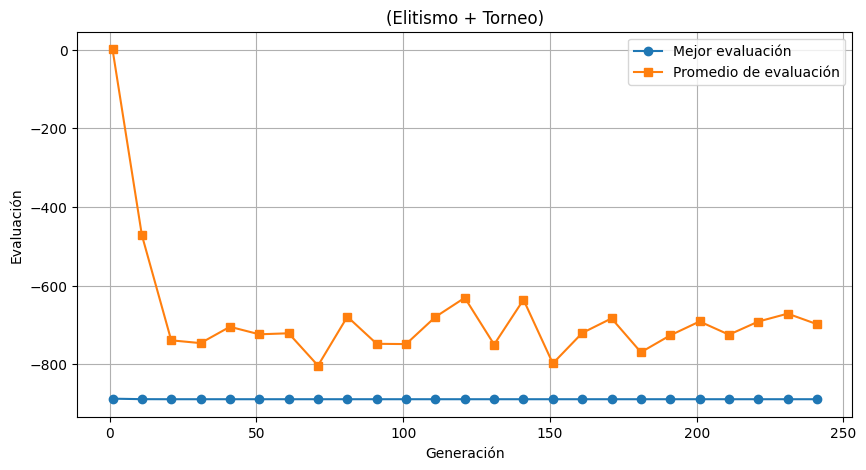

Iteración 2

=== Etapa 1 ===
Generación 10 - Mejor: -893.221 | Promedio: -703.058
Generación 20 - Mejor: -893.587 | Promedio: -694.669
Generación 30 - Mejor: -893.614 | Promedio: -724.648
Generación 40 - Mejor: -893.617 | Promedio: -731.191
Generación 50 - Mejor: -893.618 | Promedio: -723.135
Fin de la Etapa 1: Mejor en etapa: -893.618 | Promedio etapa: -629.498

=== Etapa 2 ===
Generación 60 - Mejor: -893.618 | Promedio: -598.272
Generación 70 - Mejor: -893.618 | Promedio: -744.375
Generación 80 - Mejor: -893.618 | Promedio: -744.021
Generación 90 - Mejor: -893.618 | Promedio: -658.697
Generación 100 - Mejor: -893.618 | Promedio: -588.376
Fin de la Etapa 2: Mejor en etapa: -893.618 | Promedio etapa: -675.338

=== Etapa 3 ===
Generación 110 - Mejor: -893.618 | Promedio: -732.703
Generación 120 - Mejor: -893.618 | Promedio: -710.277
Generación 130 - Mejor: -893.618 | Promedio: -726.448
Generación 140 - Mejor: -893.618 | Promedio: -676.414
Generación 150 - Mejor: -893.618 | Promedio: -69

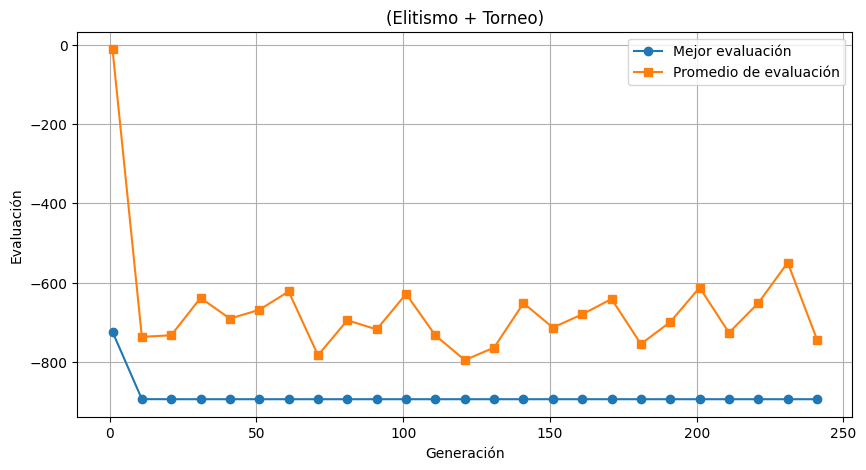

Iteración 3

=== Etapa 1 ===
Generación 10 - Mejor: -884.526 | Promedio: -639.851
Generación 20 - Mejor: -892.371 | Promedio: -697.127
Generación 30 - Mejor: -893.628 | Promedio: -730.735
Generación 40 - Mejor: -893.699 | Promedio: -711.802
Generación 50 - Mejor: -893.699 | Promedio: -680.88
Fin de la Etapa 1: Mejor en etapa: -893.699 | Promedio etapa: -595.796

=== Etapa 2 ===
Generación 60 - Mejor: -893.701 | Promedio: -724.966
Generación 70 - Mejor: -893.701 | Promedio: -693.198
Generación 80 - Mejor: -893.701 | Promedio: -761.318
Generación 90 - Mejor: -893.701 | Promedio: -645.51
Generación 100 - Mejor: -893.701 | Promedio: -679.405
Fin de la Etapa 2: Mejor en etapa: -893.701 | Promedio etapa: -693.397

=== Etapa 3 ===
Generación 110 - Mejor: -893.701 | Promedio: -780.413
Generación 120 - Mejor: -893.701 | Promedio: -687.943
Generación 130 - Mejor: -893.701 | Promedio: -756.513
Generación 140 - Mejor: -893.701 | Promedio: -742.12
Generación 150 - Mejor: -893.701 | Promedio: -664.5

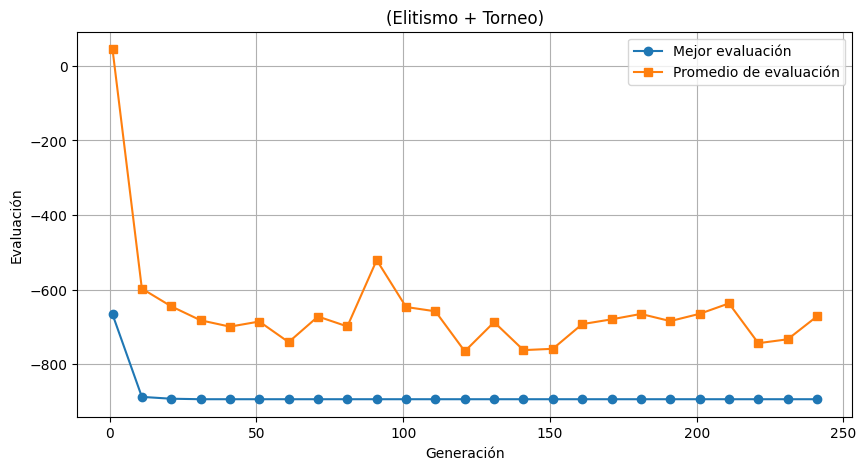

Iteración 4

=== Etapa 1 ===
Generación 10 - Mejor: -931.025 | Promedio: -702.916
Generación 20 - Mejor: -934.351 | Promedio: -782.753
Generación 30 - Mejor: -934.507 | Promedio: -770.178
Generación 40 - Mejor: -934.528 | Promedio: -811.53
Generación 50 - Mejor: -934.535 | Promedio: -722.517
Fin de la Etapa 1: Mejor en etapa: -934.535 | Promedio etapa: -687.066

=== Etapa 2 ===
Generación 60 - Mejor: -934.535 | Promedio: -663.59
Generación 70 - Mejor: -934.552 | Promedio: -859.365
Generación 80 - Mejor: -934.553 | Promedio: -761.155
Generación 90 - Mejor: -934.553 | Promedio: -766.736
Generación 100 - Mejor: -934.553 | Promedio: -785.218
Fin de la Etapa 2: Mejor en etapa: -934.553 | Promedio etapa: -769.772

=== Etapa 3 ===
Generación 110 - Mejor: -934.553 | Promedio: -740.455
Generación 120 - Mejor: -934.553 | Promedio: -743.286
Generación 130 - Mejor: -934.553 | Promedio: -770.631
Generación 140 - Mejor: -934.553 | Promedio: -785.747
Generación 150 - Mejor: -934.553 | Promedio: -845.

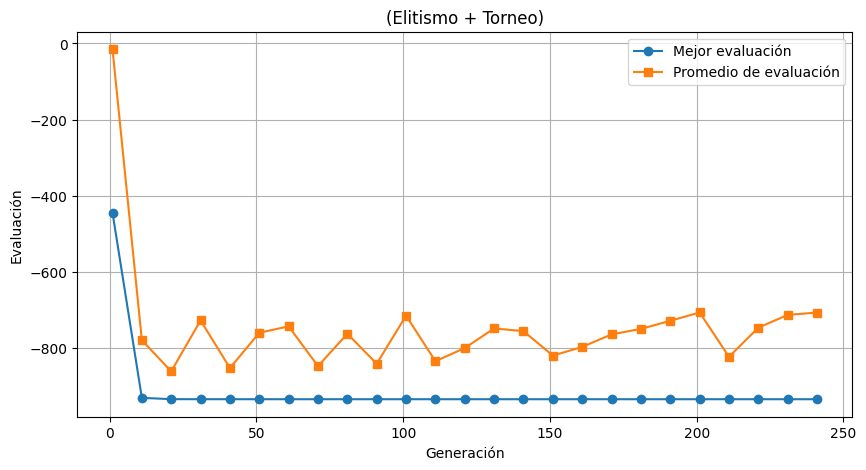

Iteración 5

=== Etapa 1 ===
Generación 10 - Mejor: -932.489 | Promedio: -754.401
Generación 20 - Mejor: -934.241 | Promedio: -682.995
Generación 30 - Mejor: -935.092 | Promedio: -728.936
Generación 40 - Mejor: -935.104 | Promedio: -702.281
Generación 50 - Mejor: -935.273 | Promedio: -782.748
Fin de la Etapa 1: Mejor en etapa: -935.273 | Promedio etapa: -677.921

=== Etapa 2 ===
Generación 60 - Mejor: -935.289 | Promedio: -761.126
Generación 70 - Mejor: -935.289 | Promedio: -741.113
Generación 80 - Mejor: -935.29 | Promedio: -740.835
Generación 90 - Mejor: -935.29 | Promedio: -652.066
Generación 100 - Mejor: -935.29 | Promedio: -814.505
Fin de la Etapa 2: Mejor en etapa: -935.29 | Promedio etapa: -759.287

=== Etapa 3 ===
Generación 110 - Mejor: -935.29 | Promedio: -706.758
Generación 120 - Mejor: -935.29 | Promedio: -811.414
Generación 130 - Mejor: -935.29 | Promedio: -797.456
Generación 140 - Mejor: -935.29 | Promedio: -782.596
Generación 150 - Mejor: -935.29 | Promedio: -867.859
Fin

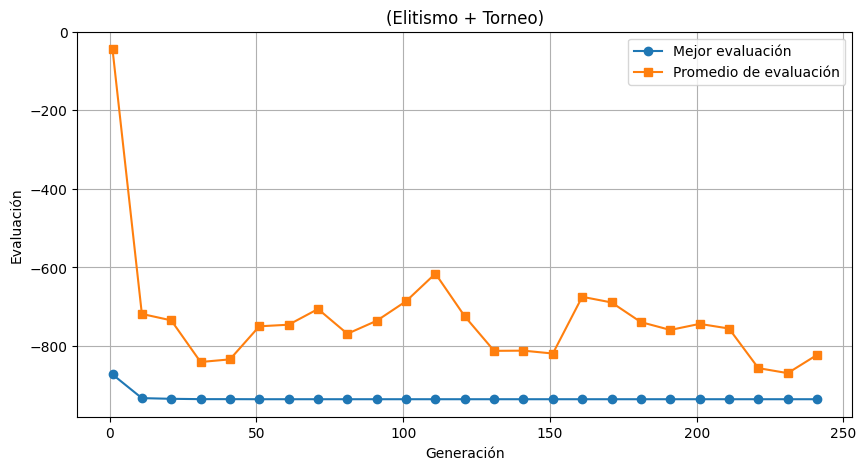

In [154]:
print("Iteración 1")
def main():
    mejor_ind, mejor_apt, total_generacion, h, h_pp = AG_etapas_ruleta(
        pob_size, m, a, b, decimales, epsilon, proba_cruza, proba_muta,
        etapas, generaciones)
    
    print("\nResultado final:")
    print("Total de generaciones:", total_generacion)
    print("Mejor genotipo:", mejor_ind)
    print("Mejor fenotipo (x1,...,xn):", deco_ind(mejor_ind, m, a, b, decimales))
    print("Mejor evaluación f(x1,...,xn):", round(mejor_apt, decimales))
    
    
    gen_indices = np.arange(1, len(h)+1)
    gen_indices_thinned = gen_indices[::10]
    h_thinned = np.array(h)[::10]
    h_pp_thinned = np.array(h_pp)[::10]
    
    plt.figure(figsize=(10, 5))
    plt.plot(gen_indices_thinned, h_thinned, marker='o', linestyle='-', label="Mejor evaluación")
    plt.plot(gen_indices_thinned, h_pp_thinned, marker='s', linestyle='-', label="Promedio de evaluación")
    plt.xlabel("Generación")
    plt.ylabel("Evaluación")
    plt.title("(Elitismo + Torneo)")
    plt.legend()
    plt.grid(True)
    plt.show()
    
if __name__ == "__main__":
    main()
    print("Iteración 2")
if __name__ == "__main__":
    main()
    print("Iteración 3")
if __name__ == "__main__":
    main()
    print("Iteración 4")
if __name__ == "__main__":
    main()
    print("Iteración 5")
if __name__ == "__main__":
    main()            